In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from EDA import EDA
warnings.filterwarnings("ignore")


In [2]:
# Import dataset and have a look at the types of features
adf = pd.read_csv(r"C:\Users\ankit\Documents\zest ai\accepted_2007_to_2018Q4.csv") 
print("Shape of dataframe is "+str(adf.shape))
print(adf.dtypes.value_counts())

Shape of dataframe is (951365, 151)
float64    113
object      38
dtype: int64


In [3]:
#Make an object of our EDA class
eda = EDA()

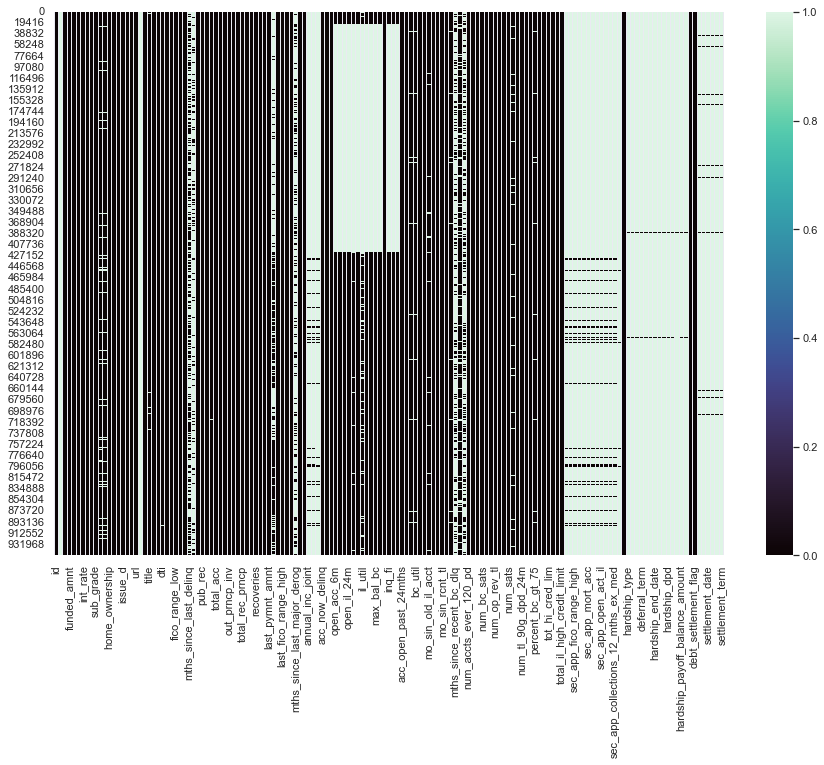

In [4]:
# find if there are any null values present in our dataset
eda.navalues(adf)

In [ ]:
'''
As evident from the above visualization, there are multiple features with mostly null values(the blue-blank part).
To further analyze our data, we first need to remove unnecessary columns. 
The next step is to remove the columns with more than 75 % null values.
'''

In [5]:
adf = eda.coldrop(adf)


In [6]:
# Seperate dataset based on their types for further analysis
obj_adf = adf.select_dtypes(include=['object'])
flt_adf = adf.select_dtypes(include=['float'])

In [7]:
print(flt_adf.shape)
print(obj_adf.shape)
# Look at how many features are left after removing features with more than 75% null values

(951365, 86)
(951365, 25)


In [8]:

print(obj_adf.apply(lambda col: col.unique()))
print(obj_adf.apply(lambda col: col.nunique()))

id                      [68407277, 68355089, 68341763, 66310712, 68476...
term                                        [ 36 months,  60 months, nan]
grade                                          [C, B, F, A, E, D, G, nan]
sub_grade               [C4, C1, B4, C5, F1, C3, B2, B1, A2, B5, C2, E...
emp_title               [leadman, Engineer, truck driver, Information ...
emp_length              [10+ years, 3 years, 4 years, 6 years, 1 year,...
home_ownership                      [MORTGAGE, RENT, OWN, ANY, nan, NONE]
verification_status        [Not Verified, Source Verified, Verified, nan]
issue_d                 [Dec-2015, Nov-2015, Oct-2015, Sep-2015, Aug-2...
loan_status             [Fully Paid, Current, Charged Off, In Grace Pe...
pymnt_plan                                                    [n, y, nan]
url                     [https://lendingclub.com/browse/loanDetail.act...
purpose                 [debt_consolidation, small_business, home_impr...
title                   [Debt consolid

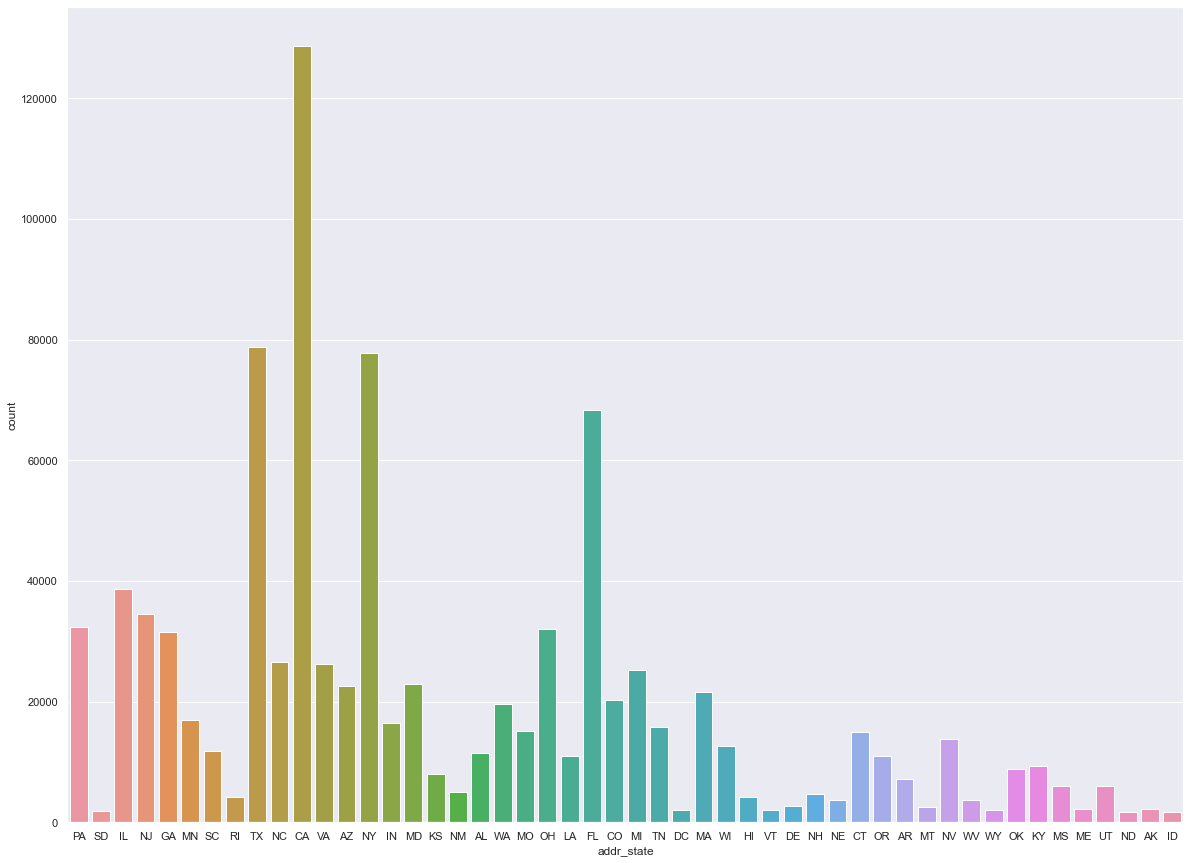

In [9]:
# Create a countplot to see which states' people take the most loans
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(obj_adf['addr_state'])

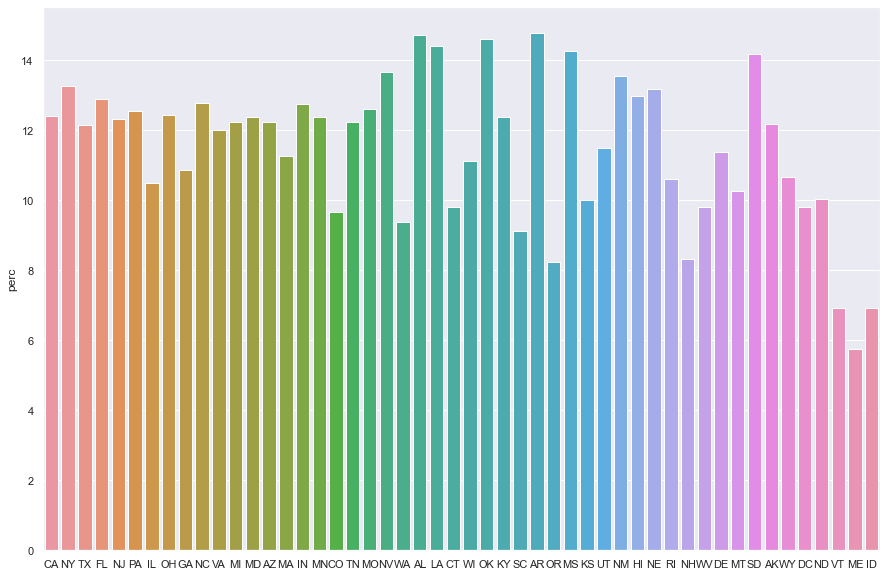

In [10]:
# how many percentage of people from each state don't pay back
eda.percentagebarplot(obj_adf, ['Default', 'Charged Off'], 'addr_state')


In [ ]:
'''
Key Insight 1: Most of the loan takers are from the state California. But, we can't say anything about people from which state 
don't repay the loans as almost all the states are in the same range 6-14%(not a huge difference)
'''

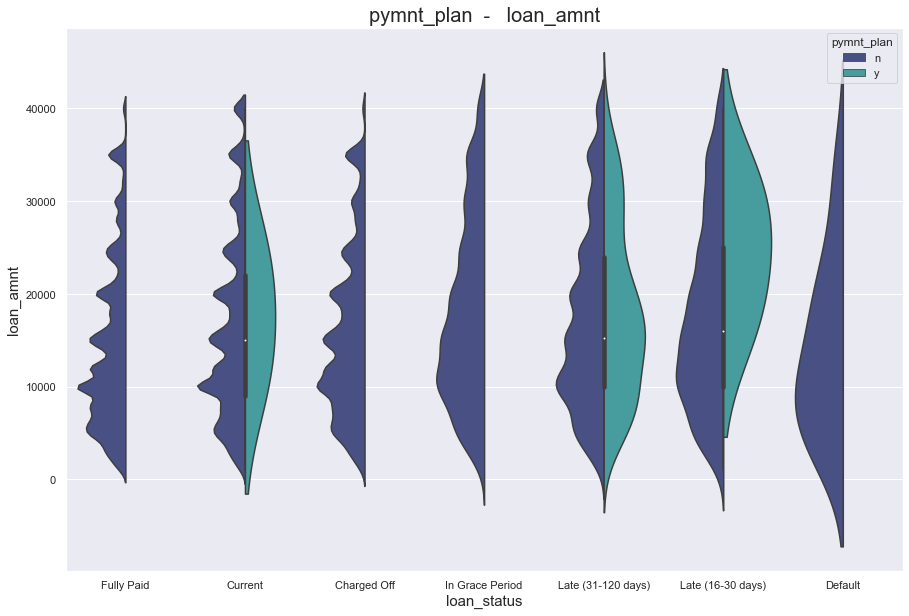

In [11]:
# How payment plan affects the loan status
eda.violin(adf, 'loan_status', 'loan_amnt', 'pymnt_plan')


In [ ]:
'''
Key Insight 2: Most of the loans are of amount near 10000. People who did not pay back did not have a payment plan.
People who fully paid back also didn't have any payment plan. 
Peope with payment plans are either currently paying or are late by 16-120 days.
'''

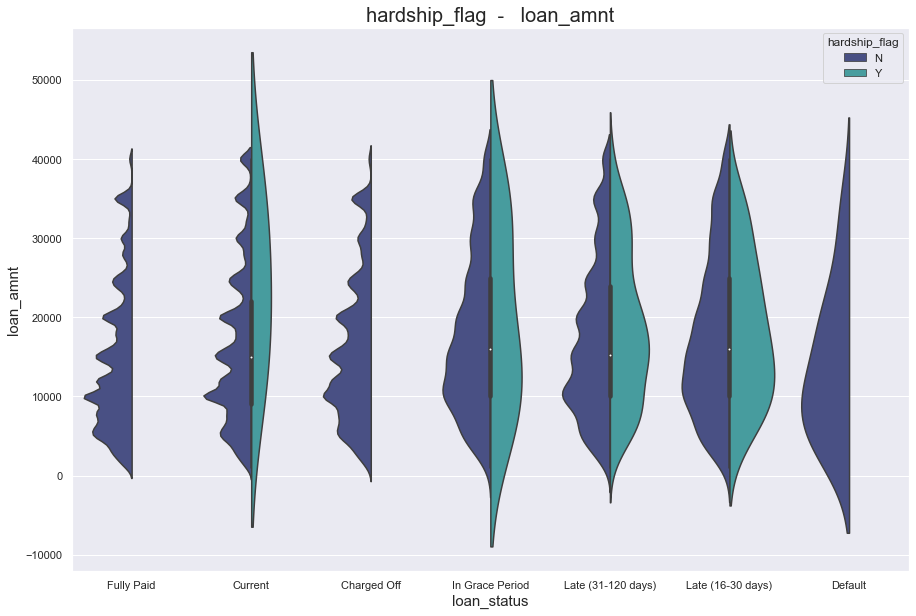

In [12]:
# How hardship flag works out?
eda.violin(adf, 'loan_status', 'loan_amnt', 'hardship_flag')


In [ ]:
'''
Key Insight 3: Hardship flag means loan takers due to some harship agreed to pay just interest for a limited period of time. 
Interestingly the hardship flag is no for Defauters and Charged-Off(people from whom there is no expectation of any payment. 
Its next stage of Defaulter) people. It means that they did not try to pay back with this scheme of paying just interests.
'''

In [13]:
#Feature Correlation
s = eda.correlation(flt_adf)
print(s[s>0.75])


loan_amnt                loan_amnt                  1.000000
total_rec_int            total_rec_int              1.000000
recoveries               recoveries                 1.000000
collection_recovery_fee  collection_recovery_fee    1.000000
last_pymnt_amnt          last_pymnt_amnt            1.000000
                                                      ...   
total_acc                num_rev_accts              0.764477
num_bc_sats              num_op_rev_tl              0.762042
num_op_rev_tl            num_bc_sats                0.762042
num_bc_sats              num_bc_tl                  0.762008
num_bc_tl                num_bc_sats                0.762008
Length: 173, dtype: float64


In [ ]:
'''
Key Insight 4: Feature Selection

There are multiple column pairs with high correlation(>75%). We can surely do well by removing one of the features from above 
pairs while creating a predictive model
'''

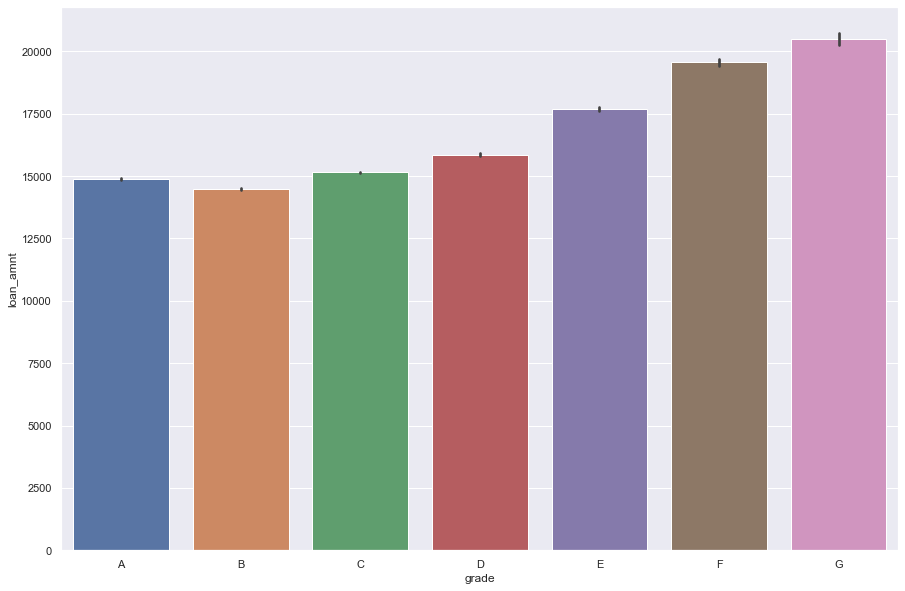

In [14]:
sns.barplot(adf['grade'], adf['loan_amnt'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] )

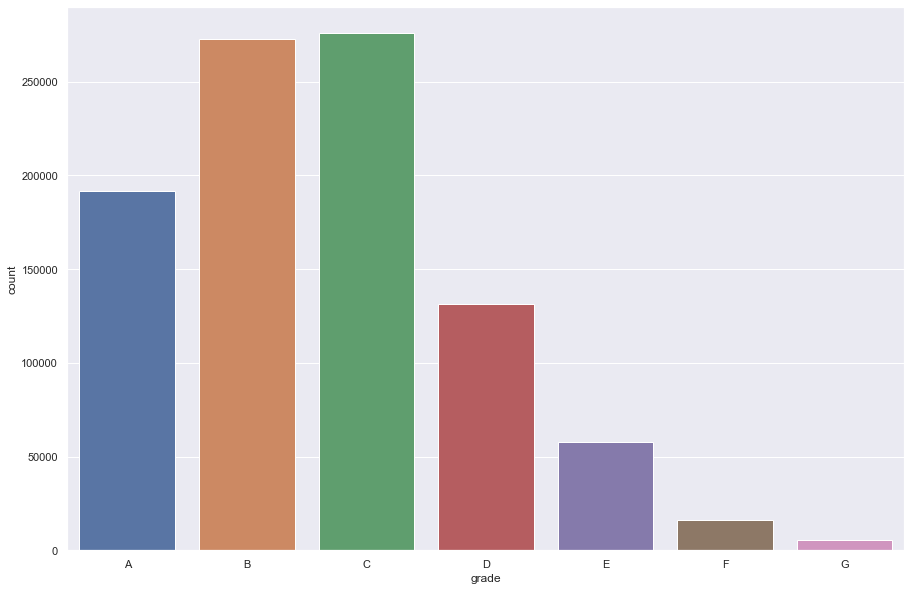

In [15]:
sns.countplot(obj_adf['grade'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

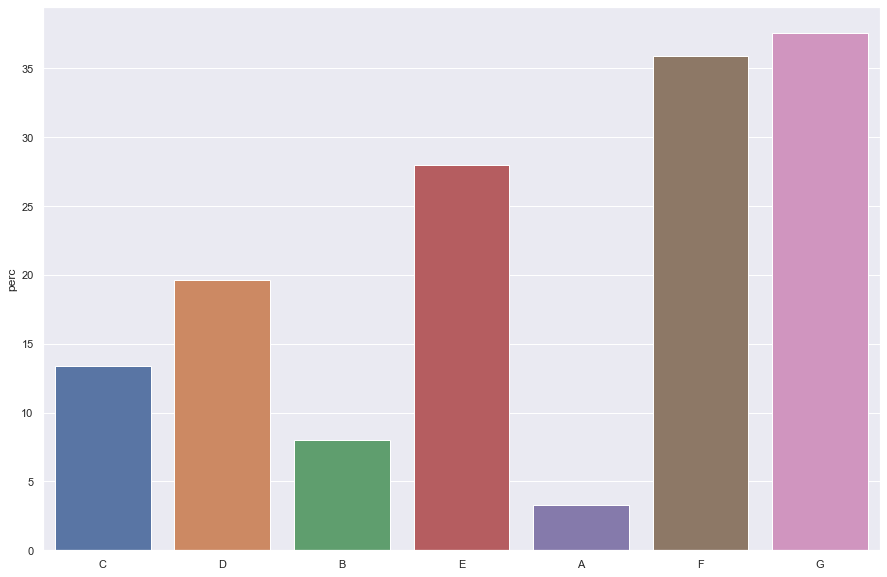

In [16]:

eda.percentagebarplot(obj_adf, ['Default', 'Charged Off'], 'grade', ['A', 'B', 'C', 'D', 'E', 'F', 'G'])



In [ ]:
'''
Key Insight 5: Most loans are lended in B and C grades. Higher the grade, higher the loan amount and hence higher the risk.
The risk is confirmed in the above plot as most people who did not pay off took higher grade loans.
'''

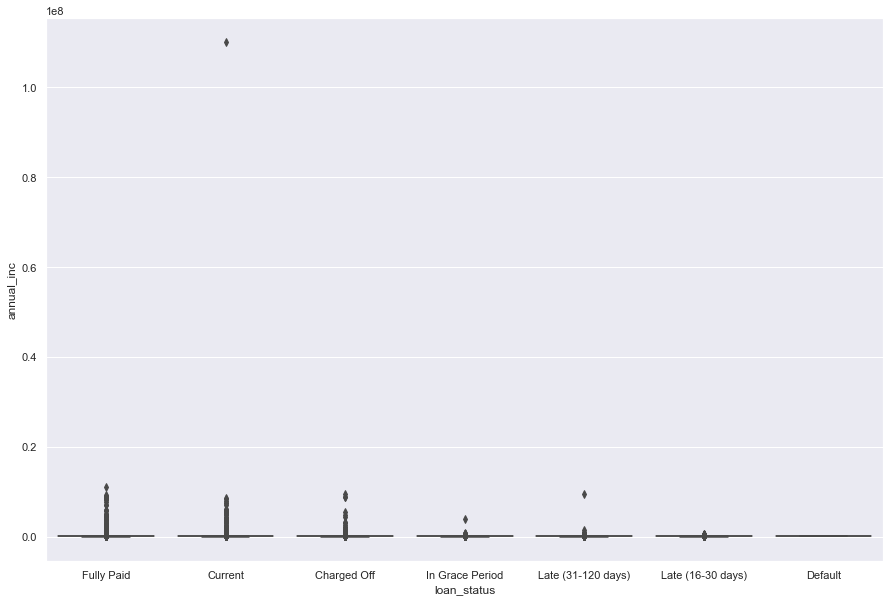

In [17]:
sns.boxplot(adf['loan_status'], adf['annual_inc'])

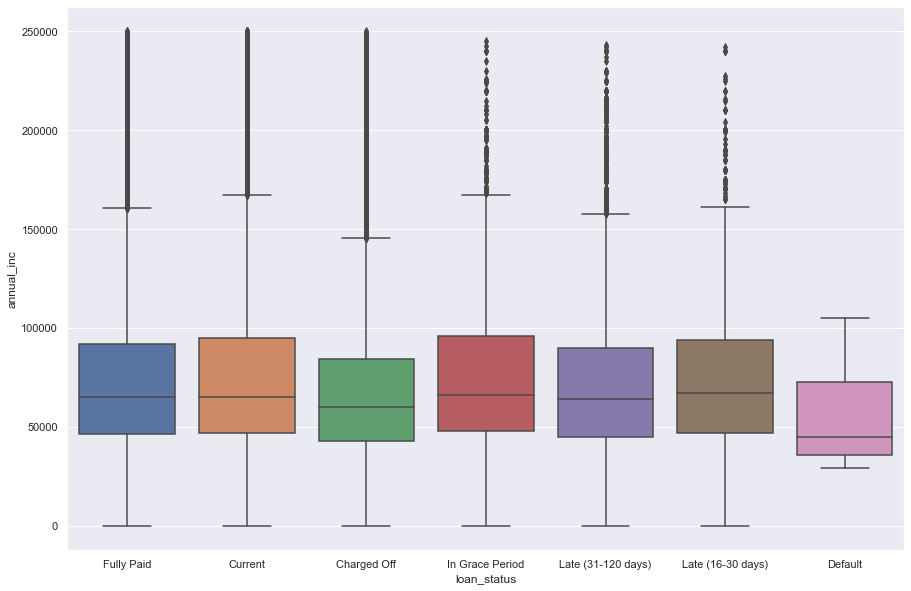

In [18]:
# To remove the outliers, filter the annual income with keep <250000 condition
adf = adf[adf['annual_inc'] <250000]
sns.boxplot(adf['loan_status'], adf['annual_inc'])

In [ ]:
'''
Key Insight 6: People in Charged Off and Default category had lower annual incomes than people in other loan status categories.
'''

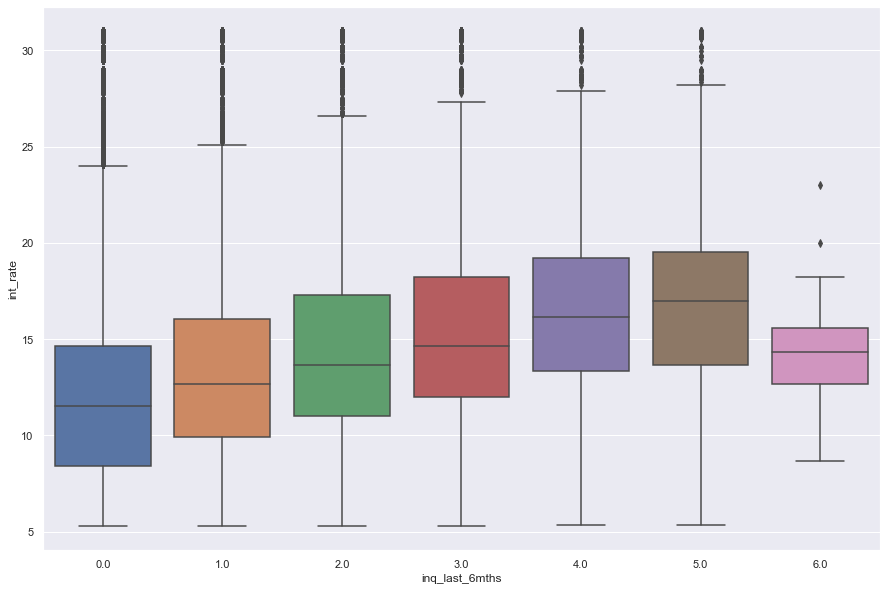

In [19]:

sns.boxplot(adf['inq_last_6mths'], adf['int_rate'])



In [ ]:
'''
Key Insight 7: Inquiries vs interest rate
The above plot confirms the assumption that higher number of credit inquiries in last 6 months result in higher interest rates. 
The cases with 6 inquiries looks like an exception though.
'''

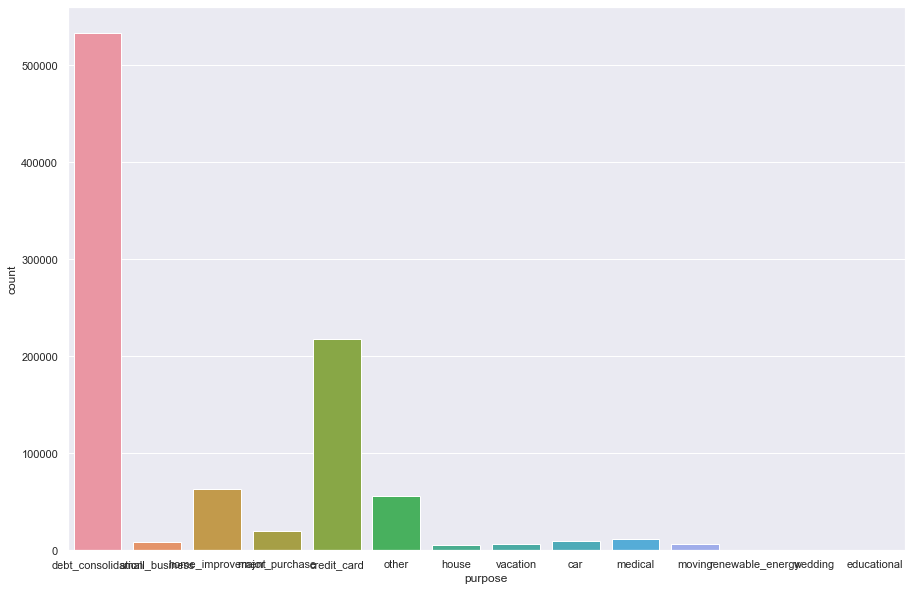

In [20]:
sns.set(rc={'figure.figsize':(15,10)})

sns.countplot(adf['purpose'])

In [ ]:
'''
Key Insight 8: Why take loans?
Most of the loans were taken for deb consolidation, which means most of the loans are taken to pay off other high interest loans.
'''

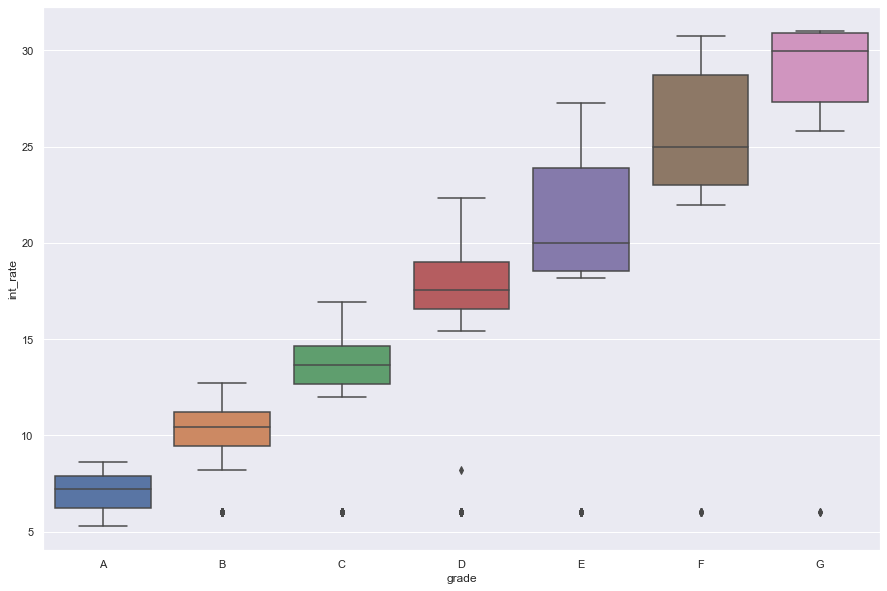

In [21]:
sns.boxplot(adf['grade'], adf['int_rate'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [ ]:
'''
Key Insight 9: Higher the grade and the risk associated with it, higher the interest rate.
'''

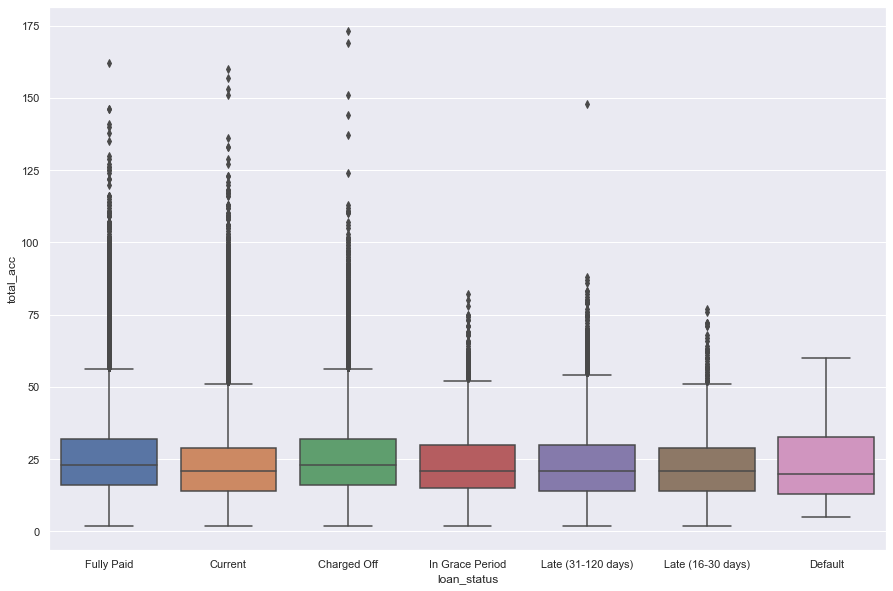

In [22]:
sns.boxplot(adf['loan_status'], adf['total_acc'])

In [ ]:
'''
Key Insight 10: Loan Status vs Total Account
People who didn't pay off(Charged Off and Default), have higher number of credit accounts than people in other loan categories. 
'''